In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import m2cgen as m2c
from sklearn.model_selection import train_test_split

In [4]:
data1=pd.read_csv("CSV_files/new_mvgavg+286.csv",header=None)
data2=pd.read_csv("CSV_files/new_mvgavg+136.csv",header=None)
data3=pd.read_csv("CSV_files/new_mvgavg+62.csv",header=None)
data4=pd.read_csv("CSV_files/new_mvgavg-62.csv",header=None)
data5=pd.read_csv("CSV_files/new_mvgavg-31.csv",header=None)
data6=pd.read_csv("CSV_files/new_mvgavg-24.csv",header=None)
data7=pd.read_csv("CSV_files/new_mvgavg-286.csv",header=None)
data8=pd.read_csv("CSV_files/new_mvgavg-136.csv",header=None)

"""columns1=[]
for i in range(750):
    if (i+2)%6==0 or (i+1)%6==0:
        columns1.append(i)
#print(columns)"""

ones=np.ones((484,))
zeroes=np.zeros((539,))
binary=np.concatenate([ones,zeroes])
pos=pd.concat([data1,data2,data3])
neg=pd.concat([data4,data5,data6,data7,data8])
step=pd.concat([pos,neg], ignore_index=True)
X=np.array(step)
X=X.reshape(1023,375)
y=binary

df=pd.DataFrame(step)
df

,0,1,2
0,-0.63024,-0.14404,-0.03102
1,-0.64724,-0.14404,-0.03102
2,-0.64124,-0.14704,-0.03102
3,-0.64024,-0.14804,-0.03202
4,-0.64324,-0.15104,-0.03202
...,...,...,...
127870,-0.57778,-0.51798,-0.00540
127871,-0.57778,-0.51798,-0.00540
127872,-0.57778,-0.51798,-0.00540
127873,-0.57778,-0.51798,-0.00540


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

#X1=pd.DataFrame(StandardScaler().fit_transform(X))
X1=pd.DataFrame(MinMaxScaler().fit_transform(X))
#std=np.array(X1.std().sort_values())
X

array([[-0.63024, -0.14404, -0.03102, ..., -0.64624, -0.18604, -0.03002],
       [-0.64924, -0.15404, -0.02902, ..., -0.65924, -0.16004, -0.03002],
       [-0.65524, -0.15304, -0.02902, ..., -0.65224, -0.16804, -0.02902],
       ...,
       [-0.59678, -0.45798, -0.0064 , ..., -0.58978, -0.52898, -0.0064 ],
       [-0.60678, -0.51898, -0.0064 , ..., -0.90778,  0.01902, -0.0024 ],
       [-0.61278, -0.49598, -0.0024 , ..., -0.57778, -0.51798, -0.0054 ]])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X1)
len(X1)

302

In [22]:
from tpot import TPOTClassifier
fixed_model = {
    'sklearn.ensemble.RandomForestClassifier': {
    }
}
#model1=TPOTClassifier(verbosity=2,n_jobs=1,generations=2,config_dict='TPOT light')
model1=TPOTClassifier(verbosity=2,n_jobs=1,generations=2,config_dict='TPOT light')
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.2,stratify=y)
model1.fit(X_train1,y_train1)

C:\Users\AISHWARYA\AppData\Roaming\Python\Python311\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
Version 0.12.1 of tpot is outdated. Version 0.12.2 was released 7 days ago.


                                                                              
Generation 1 - Current best internal CV score: 0.8985560377076164
                                                                              
Generation 2 - Current best internal CV score: 0.8985560377076164
                                                                              
Best pipeline: DecisionTreeClassifier(BernoulliNB(input_matrix, alpha=0.001, fit_prior=True), criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5)


TPOTClassifier(config_dict='TPOT light', generations=2, verbosity=2)

In [29]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)
#model4=DecisionTreeClassifier( criterion='gini', max_depth=8, min_samples_leaf=15, min_samples_split=13)
model4=DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3, min_samples_split=5)
#model4.fit(X,y)
model4.fit(X_train,y_train)
model4.score(X_test,y_test)
#test_data = pd.read_csv('newtestdata_neg3.csv',header=None)
#fest_data=pd.read_csv('newtestdata_pos3.csv',header=None)
#predictions = model4.predict(test_data)
#model4.score(X_test,y_test)

0.9121951219512195

In [35]:
model_to_c = m2c.export_to_c(model4)  
model_to_c

'#include <string.h>\nvoid score(double * input, double * output) {\n    double var0[2];\n    if (input[93] <= -0.5979099869728088) {\n        if (input[12] <= -0.6660099923610687) {\n            if (input[26] <= 0.0189800001680851) {\n                memcpy(var0, (double[]){0.0, 1.0}, 2 * sizeof(double));\n            } else {\n                memcpy(var0, (double[]){0.3333333333333333, 0.6666666666666666}, 2 * sizeof(double));\n            }\n        } else {\n            if (input[161] <= -0.05234000086784363) {\n                if (input[270] <= 0.4892899990081787) {\n                    if (input[101] <= 0.16079000383615494) {\n                        memcpy(var0, (double[]){1.0, 0.0}, 2 * sizeof(double));\n                    } else {\n                        memcpy(var0, (double[]){0.4, 0.6}, 2 * sizeof(double));\n                    }\n                } else {\n                    if (input[198] <= 3.695340096950531) {\n                        memcpy(var0, (double[]){0.33333333

In [46]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y)
model=RandomForestClassifier(n_estimators=3)
model.fit(X,y)
#model.fit(X_train,y_train)
#model.score(X_test,y_test)


0.9611650485436893

In [ ]:
#test_data = pd.read_csv('noise.csv',header=None)
#test_data=test_data.reshape(101,750)
fest_data=np.array(pd.read_csv('pos_101.csv',header=None))
predictions = model.predict(X_test)
#model.score(X_test,y_test)
model.score(X_test,y_test)


1.0

In [ ]:
model_to_c1 = m2c.export_to_c(model)  
model_to_c1

'#include <string.h>\nvoid add_vectors(double *v1, double *v2, int size, double *result) {\n    for(int i = 0; i < size; ++i)\n        result[i] = v1[i] + v2[i];\n}\nvoid mul_vector_number(double *v1, double num, int size, double *result) {\n    for(int i = 0; i < size; ++i)\n        result[i] = v1[i] * num;\n}\nvoid score(double * input, double * output) {\n    double var0[2];\n    double var1[2];\n    double var2[2];\n    double var3[2];\n    if (input[5] <= -0.3050000071525574) {\n        if (input[381] <= -2.524999976158142) {\n            if (input[121] <= -0.5700000077486038) {\n                memcpy(var3, (double[]){0.0, 1.0}, 2 * sizeof(double));\n            } else {\n                memcpy(var3, (double[]){1.0, 0.0}, 2 * sizeof(double));\n            }\n        } else {\n            if (input[238] <= 18.63499927520752) {\n                if (input[333] <= 8.050000190734863) {\n                    if (input[373] <= -15.78499984741211) {\n                        memcpy(var3, (

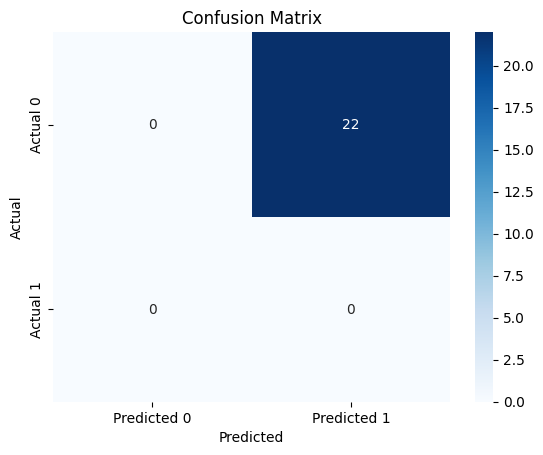

In [ ]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(fest_data)
y_test=np.zeros((22,))
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()